In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# PRE-PROCESSING

In [2]:
data=pd.read_excel('dataset.xlsx')

In [3]:
df = data.copy()
df.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Création des sous-ensembles (suite au EDA)

In [4]:
missing_rate = df.isna().sum()/df.shape[0]

In [5]:
blood_columns = list(df.columns[(missing_rate < 0.9) & (missing_rate >0.88)])
viral_columns = list(df.columns[(missing_rate < 0.80) & (missing_rate > 0.75)])

In [6]:
key_columns = ['Patient age quantile', 'SARS-Cov-2 exam result']

In [7]:
df = df[key_columns + blood_columns + viral_columns]
df.head()

,Patient age quantile,SARS-Cov-2 exam result,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,...,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2
0,13,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17,negative,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,...,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected
2,8,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected


## TrainTest - Nettoyage - Encodage

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
trainset , testset = train_test_split(df , test_size=0.25, random_state=55)

In [10]:
trainset['SARS-Cov-2 exam result'].value_counts()

negative    3820
positive     413
Name: SARS-Cov-2 exam result, dtype: int64

In [11]:
testset['SARS-Cov-2 exam result'].value_counts()

negative    1266
positive     145
Name: SARS-Cov-2 exam result, dtype: int64

In [12]:
def encodage(df):
    code = {'negative':0,
            'positive':1,
            'not_detected':0,
            'detected':1}
    
    for col in df.select_dtypes('object').columns:
        df[col] = df[col].map(code)
        
    return df

In [13]:
def imputation(df):
    return df.dropna(axis=0)

In [14]:
def feature_engineering(df):
    df['est malade'] = df[viral_columns].sum(axis=1) >= 1
    df = df.drop(viral_columns, axis=1)
    return df

In [15]:
def preprocessing(df):
    
    df = encodage(df)
    df = feature_engineering(df)
    df = imputation(df)
    
    X = df.drop('SARS-Cov-2 exam result', axis=1)
    y = df['SARS-Cov-2 exam result']
    
    print(y.value_counts())
    
    return X, y

In [16]:
X_train , y_train = preprocessing(trainset)

0    388
1     57
Name: SARS-Cov-2 exam result, dtype: int64


In [17]:
X_test, y_test = preprocessing(testset)

0    129
1     24
Name: SARS-Cov-2 exam result, dtype: int64


## Modellisation

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures,StandardScaler

## Procédure d'évaluation

In [19]:
def evaluation(model):
    
    model.fit(X_train,y_train)
    ypred=model.predict(X_test)
    ypred_train=model.predict(X_train)
    
    print("train - confusion_matrix:")
    print(confusion_matrix(y_train,ypred_train))
    print("test- confusion_matrix:")
    print(confusion_matrix(y_test,ypred))
    
    
    print(classification_report(y_test,ypred))
    N, train_score, val_score = learning_curve(model, X_train, y_train,
                                              cv=6, scoring='f1',
                                               train_sizes=np.linspace(0.1, 1, 10))
    N_recall, train_score_recall, val_score_recall = learning_curve(model, X_train, y_train,
                                              cv=6, scoring='recall',
                                               train_sizes=np.linspace(0.1, 1, 10))
    
    f1_train=train_score.mean(axis=1)
    print("f1_train:",f1_train[-1])
    f1_val=val_score.mean(axis=1)
    print("f1_val:",f1_val[-1])
    recall_train=train_score_recall.mean(axis=1)
    print("recall_train:",recall_train[-1])
    recall_val=val_score_recall.mean(axis=1)
    print("recall_val:",recall_val[-1])

    
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='f1 train score')
    plt.plot(N, val_score.mean(axis=1), label='f1 validation score')
    plt.plot(N, train_score_recall.mean(axis=1), label='recall train score')
    plt.plot(N, val_score_recall.mean(axis=1), label='recall validation score')
    plt.legend()
        

In [20]:
preprocessor = make_pipeline(PolynomialFeatures(2, include_bias=False), SelectKBest(f_classif, k=10))

In [21]:
RandomForest = make_pipeline(preprocessor, RandomForestClassifier(random_state=0))
AdaBoost = make_pipeline(preprocessor, AdaBoostClassifier(random_state=0))
SVM = make_pipeline(preprocessor, StandardScaler(), SVC(random_state=0))
KNN = make_pipeline(preprocessor, StandardScaler(), KNeighborsClassifier())

In [22]:
dict_of_models = {'RandomForest': RandomForest,
                  'AdaBoost' : AdaBoost,
                  'SVM': SVM,
                  'KNN': KNN
                 }

RandomForest
train - confusion_matrix:
[[388   0]
 [  0  57]]
test- confusion_matrix:
[[126   3]
 [ 10  14]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       129
           1       0.82      0.58      0.68        24

    accuracy                           0.92       153
   macro avg       0.88      0.78      0.82       153
weighted avg       0.91      0.92      0.91       153

f1_train: 1.0
f1_val: 0.3591503267973856
recall_train: 1.0
recall_val: 0.28518518518518526
AdaBoost
train - confusion_matrix:
[[381   7]
 [ 16  41]]
test- confusion_matrix:
[[121   8]
 [ 12  12]]
              precision    recall  f1-score   support

           0       0.91      0.94      0.92       129
           1       0.60      0.50      0.55        24

    accuracy                           0.87       153
   macro avg       0.75      0.72      0.73       153
weighted avg       0.86      0.87      0.86       153

f1_train: 0.8659280932674133
f1_val: 0.43

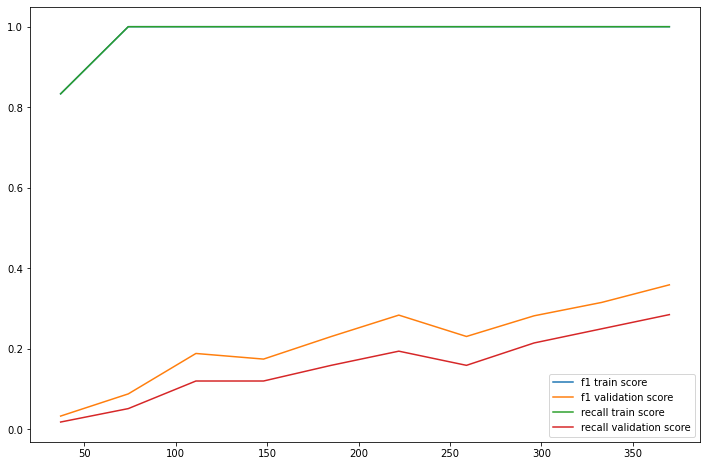

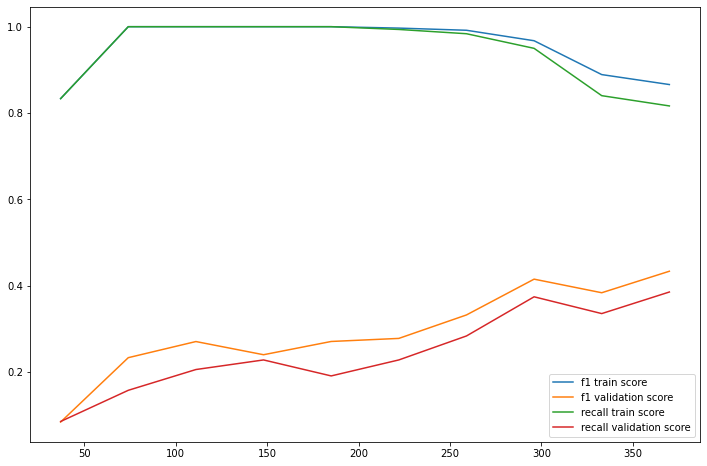

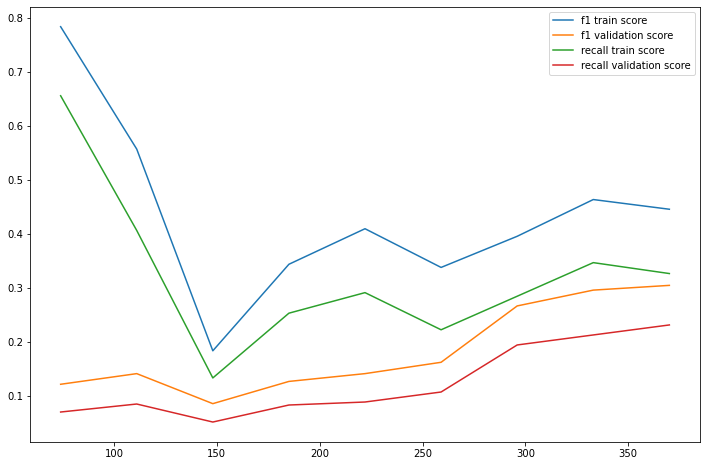

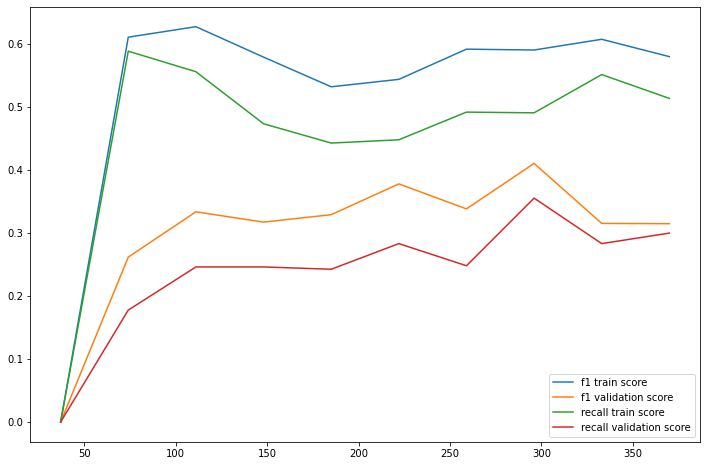

In [23]:
for name, model in dict_of_models.items():
    print(name)
    evaluation(model)

# Optimisaton

In [24]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [25]:
hyper_params = {'svc__gamma':['scale', 'auto',1e-3, 1e-4, 0.0005],
                'svc__C':[1, 10, 100, 1000, 3000],
                'svc__kernel' : ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
                'svc__degree':[2, 3, 4],
               'pipeline__polynomialfeatures__degree':[2, 3],
               'pipeline__selectkbest__k': range(40, 65)}

In [26]:
grid = RandomizedSearchCV(SVM, hyper_params, scoring='recall', cv=6,
                          n_iter=40)

grid.fit(X_train, y_train)

print(grid.best_params_)

y_pred = grid.predict(X_test)

print(classification_report(y_test, y_pred))

{'svc__kernel': 'linear', 'svc__gamma': 'scale', 'svc__degree': 4, 'svc__C': 1000, 'pipeline__selectkbest__k': 55, 'pipeline__polynomialfeatures__degree': 2}
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       129
           1       0.68      0.71      0.69        24

    accuracy                           0.90       153
   macro avg       0.81      0.82      0.82       153
weighted avg       0.90      0.90      0.90       153



train - confusion_matrix:
[[385   3]
 [ 15  42]]
test- confusion_matrix:
[[121   8]
 [  7  17]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       129
           1       0.68      0.71      0.69        24

    accuracy                           0.90       153
   macro avg       0.81      0.82      0.82       153
weighted avg       0.90      0.90      0.90       153

f1_train: 0.8604521827232281
f1_val: 0.49367609845870714
recall_train: 0.8242239695754958
recall_val: 0.5222222222222223


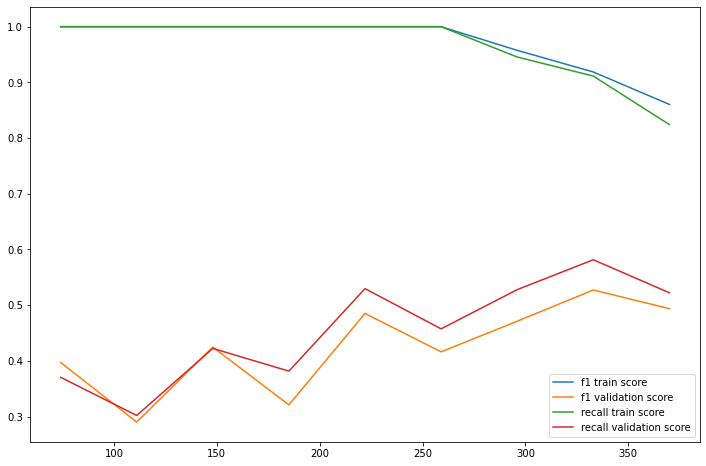

In [27]:
evaluation(grid.best_estimator_)

# Sauvegarde du meilleur model

In [28]:
from sklearn.model_selection import cross_val_score

In [29]:
def recall_scor(model):
    val_score_recall=cross_val_score(model, X_train, y_train, cv=6, scoring='recall')
    val_score_recall_mean=val_score_recall.mean()
    return val_score_recall_mean

In [30]:
from joblib import dump, load

In [31]:
try:
    best_Recall_SVC= load('best_Recall_SVC.modele')
except:  best_Recall_SVC= grid.best_estimator_
    

In [32]:
potential_new_best_Recall_SVC= grid.best_estimator_
if recall_scor(potential_new_best_Recall_SVC)>recall_scor(best_Recall_SVC):
    best_Recall_SVC=grid.best_estimator_
    dump(best_Recall_SVC, 'best_Recall_SVC.modele')
else:
    print("le nouveau run n'a pas aboutis à un meilleur score")

le nouveau run n'a pas aboutis à un meilleur score


In [33]:
best_Recall_SVC.get_params

<bound method Pipeline.get_params of Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('polynomialfeatures',
                                  PolynomialFeatures(include_bias=False)),
                                 ('selectkbest', SelectKBest(k=51))])),
                ('standardscaler', StandardScaler()),
                ('svc',
                 SVC(C=100, degree=2, gamma='auto', kernel='poly',
                     random_state=0))])>

train - confusion_matrix:
[[387   1]
 [  3  54]]
test- confusion_matrix:
[[119  10]
 [  7  17]]
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       129
           1       0.63      0.71      0.67        24

    accuracy                           0.89       153
   macro avg       0.79      0.82      0.80       153
weighted avg       0.90      0.89      0.89       153

f1_train: 0.9839451681665313
f1_val: 0.4886293467529166
recall_train: 0.9718496248329735
recall_val: 0.561111111111111


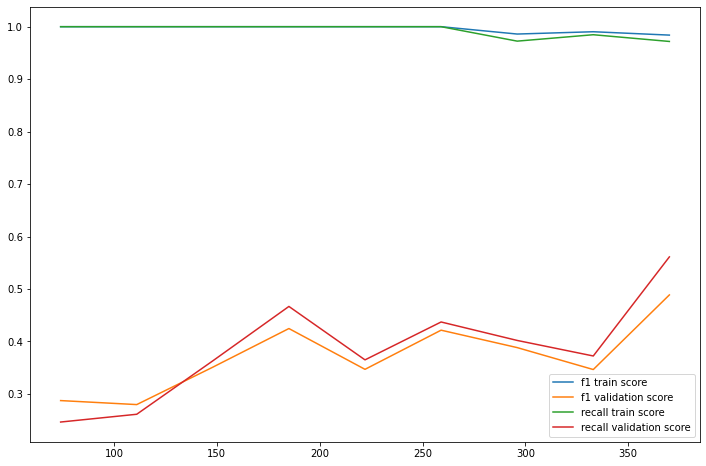

In [34]:
evaluation(best_Recall_SVC)

## Precision Recall Curve

In [35]:
from sklearn.metrics import precision_recall_curve

In [36]:
precision, recall, threshold = precision_recall_curve(y_test, best_Recall_SVC.decision_function(X_test))

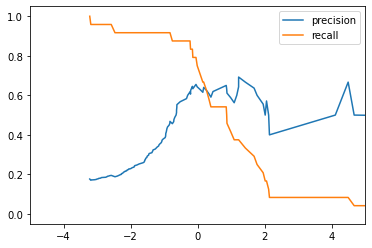

In [44]:
plt.plot(threshold, precision[:-1], label='precision')
plt.plot(threshold, recall[:-1], label='recall')
plt.xlim([-5, 5])
plt.legend()

In [45]:
def model_final(model, X, threshold=0):
    return model.decision_function(X) > threshold

In [51]:
y_pred = model_final(best_Recall_SVC, X_test, threshold=-0.5)

In [52]:
from sklearn.metrics import recall_score

In [53]:
f1_score(y_test, y_pred)

0.7000000000000001

In [54]:
recall_score(y_test, y_pred)

0.875

In [55]:
confusion_matrix(y_test,y_pred)

array([[114,  15],
       [  3,  21]], dtype=int64)